In [36]:
import tensorflow as tf
import numpy as np
import pandas as pd

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.1


In [37]:
path_to_train_file = tf.keras.utils.get_file(
    'train.txt',
    'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt'
)
path_to_test_file = tf.keras.utils.get_file(
    'test.txt',
    'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt'
)

In [38]:
path_to_train_file = tf.keras.utils.get_file(
    'train.txt',
    'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt'
)
path_to_test_file = tf.keras.utils.get_file(
    'test.txt',
    'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt'
)

train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

print('Length of train text: {} characters'.format(len(train_text)))
print('Length of test text: {} characters'.format(len(test_text)))
print(train_text[:300]) 

Length of train text: 6937271 characters
Length of test text: 2318260 characters
id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [39]:
train_Y = np.array([
    [int(row.split('\t')[2])]
    for row in train_text.split('\n')[1:]
    if row.count('\t') > 0
])

test_Y = np.array([
    [int(row.split('\t')[2])]
    for row in test_text.split('\n')[1:]
    if row.count('\t') > 0
])

print("train_Y shape:", train_Y.shape)
print("test_Y shape:", test_Y.shape)
print("train_Y sample:", train_Y[:5])

train_Y shape: (150000, 1)
test_Y shape: (50000, 1)
train_Y sample: [[0]
 [1]
 [0]
 [0]
 [1]]


In [40]:
import re

def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [41]:
VOCAB_SIZE = 2000   # 단어 사전 크기
MAX_LEN = 25        # 최대 문장 길이 (패딩 기준)

vectorize_layer = tf.keras.layers.TextVectorization(
    standardize='lower_and_strip_punctuation',  # 소문자 변환 + 구두점 제거
    split='whitespace',                         # 띄어쓰기 기준 토큰화
    max_tokens=VOCAB_SIZE,                      # 단어 사전 크기
    output_mode='int',                          # 정수 인코딩
    output_sequence_length=MAX_LEN              # 자동 패딩
)

vectorize_layer.adapt(train_text_X)  # 단어 사전 학습
# 텍스트를 정수 시퀀스로 변환 (패딩 포함)
train_X = vectorize_layer(train_text_X)

print(train_X[:5])

tf.Tensor(
[[  23  902    5    1 1097    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [ 586    1    1    1    1    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   1    1   68  345   28   33    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   1    1  102    1    2    1    1  844    1    1  570    1    0    0
     0    0    0    0    0    0    0    0    0    0    0]], shape=(5, 25), dtype=int64)


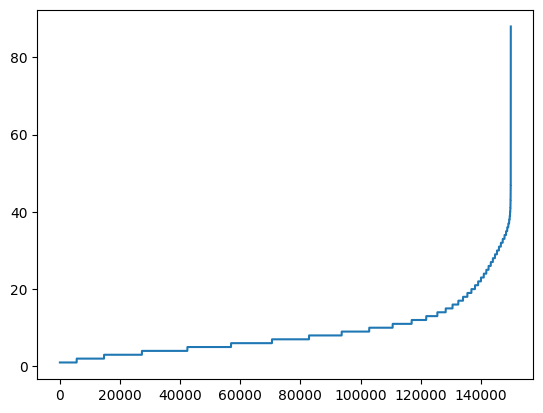

142587


In [42]:
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [43]:
test_text_X = [
    row.split('\t')[1]
    for row in test_text.split('\n')[1:]
    if row.count('\t') > 0
]

# Week1에서 학습된 vectorize_layer 그대로 사용합니다.
test_X = vectorize_layer(test_text_X)

print("test_X shape:", test_X.shape)
print("test_Y shape:", test_Y.shape)


test_X shape: (50000, 25)
test_Y shape: (50000, 1)


In [44]:
# 모델의 주요 설정값들을 미리 정의해줍니다.
VOCAB_SIZE = 2000
EMBEDDING_DIM = 128
MAX_LEN = 25
EPOCHS = 10
BATCH_SIZE = 32

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_shape=(MAX_LEN,)),
    tf.keras.layers.GlobalAveragePooling1D(), #입력층
    tf.keras.layers.Dense(64, activation='relu'), #은닉층
    tf.keras.layers.Dense(1, activation='sigmoid') #출력층
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 25, 128)           256000    
                                                                 
 global_average_pooling1d_2  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 264321 (1.01 MB)
Trainable params: 264321 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(
    train_X, train_Y,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.4925 - accuracy: 0.7325 - val_loss: 0.4616 - val_accuracy: 0.7571
Epoch 2/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.4583 - accuracy: 0.7536 - val_loss: 0.4612 - val_accuracy: 0.7531
Epoch 3/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.4518 - accuracy: 0.7566 - val_loss: 0.4535 - val_accuracy: 0.7594
Epoch 4/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.4471 - accuracy: 0.7581 - val_loss: 0.4572 - val_accuracy: 0.7571
Epoch 5/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.4430 - accuracy: 0.7614 - val_loss: 0.4541 - val_accuracy: 0.7618
Epoch 6/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.4384 - accuracy: 0.7655 - val_loss: 0.4576 - val_accuracy: 0.7586
Epoch 7/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.4341 - accuracy: 0.7668 - val_loss: 0.4608 - val_ac

In [48]:
test_loss, test_acc = model.evaluate(test_X, test_Y, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.4849, Test Accuracy: 0.7371


In [49]:
example_sentences = [
    "이 영화 진짜 재미있어요",
    "완전 지루하고 별로였음",
    "배우 연기는 좋았지만 스토리가 아쉬웠다"
]

example_seq = vectorize_layer(example_sentences)
pred = model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 [==============================] - 0s 48ms/step
문장: 이 영화 진짜 재미있어요
긍정 확률: 0.9925
결과: 긍정 😊
문장: 완전 지루하고 별로였음
긍정 확률: 0.0141
결과: 부정 😞
문장: 배우 연기는 좋았지만 스토리가 아쉬웠다
긍정 확률: 0.0184
결과: 부정 😞


In [50]:
from tensorflow.keras.layers import SimpleRNN
import random

EMBEDDING_DIM = 128
EPOCHS = 10
BATCH_SIZE = 32

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LEN,)),
    tf.keras.layers.Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBEDDING_DIM,
        input_length=MAX_LEN
    ),
    SimpleRNN(units=50), #RNN 사용
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

rnn_model.summary()
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 25, 128)           256000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                8950      
                                                                 
 dense_13 (Dense)            (None, 64)                3264      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 268279 (1.02 MB)
Trainable params: 268279 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
history_rnn = rnn_model.fit(
	train_X, train_Y, 
	epochs=EPOCHS, 
	batch_size=BATCH_SIZE, 
	validation_split=0.2,
	verbose=1
)

Epoch 1/10
3750/3750 [==============================] - 37s 10ms/step - loss: 0.5230 - accuracy: 0.7171 - val_loss: 0.4776 - val_accuracy: 0.7495
Epoch 2/10
3750/3750 [==============================] - 38s 10ms/step - loss: 0.4731 - accuracy: 0.7484 - val_loss: 0.4765 - val_accuracy: 0.7570
Epoch 3/10
3750/3750 [==============================] - 34s 9ms/step - loss: 0.4610 - accuracy: 0.7522 - val_loss: 0.4699 - val_accuracy: 0.7464
Epoch 4/10
3750/3750 [==============================] - 34s 9ms/step - loss: 0.4523 - accuracy: 0.7569 - val_loss: 0.4717 - val_accuracy: 0.7510
Epoch 5/10
3750/3750 [==============================] - 34s 9ms/step - loss: 0.4446 - accuracy: 0.7613 - val_loss: 0.4682 - val_accuracy: 0.7565
Epoch 6/10
3750/3750 [==============================] - 36s 10ms/step - loss: 0.4376 - accuracy: 0.7647 - val_loss: 0.4827 - val_accuracy: 0.7437
Epoch 7/10
3750/3750 [==============================] - 36s 10ms/step - loss: 0.4314 - accuracy: 0.7687 - val_loss: 0.4889 - va

In [52]:
test_loss, test_acc = rnn_model.evaluate(test_X, test_Y, verbose=0)
print(f"Rnn Test Loss: {test_loss:.4f}, Rnn Test Accuracy: {test_acc:.4f}")

Rnn Test Loss: 0.5191, Rnn Test Accuracy: 0.7327


In [53]:
example_sentences = [
    "배우 연기는 좋았지만 스토리가 아쉬웠다",
    "스토리는 아쉬웠지만 배우 연기는 좋았다"
]

example_seq = vectorize_layer(example_sentences)
pred = rnn_model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 [==============================] - 0s 103ms/step
문장: 배우 연기는 좋았지만 스토리가 아쉬웠다
긍정 확률: 0.0118
결과: 부정 😞
문장: 스토리는 아쉬웠지만 배우 연기는 좋았다
긍정 확률: 0.7789
결과: 긍정 😊


In [54]:
example_sentences = [
    "배우연기는 좋았지만 스토리가 아쉬웠다", 
    "스토리는 아쉬웠지만 배우 연기는 좋았다"
]

example_seq = vectorize_layer(example_sentences)
pred = model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 [==============================] - 0s 23ms/step
문장: 배우연기는 좋았지만 스토리가 아쉬웠다
긍정 확률: 0.0626
결과: 부정 😞
문장: 스토리는 아쉬웠지만 배우 연기는 좋았다
긍정 확률: 0.5687
결과: 긍정 😊


In [55]:
from tensorflow.keras.layers import LSTM
import random

EMBEDDING_DIM = 128
EPOCHS = 10
BATCH_SIZE = 32

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

lstm_model = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LEN,)),
    tf.keras.layers.Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBEDDING_DIM,
        input_length=MAX_LEN
    ),
    LSTM(units=50), #RNN 사용
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

lstm_model.summary()
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 25, 128)           256000    
                                                                 
 lstm_1 (LSTM)               (None, 50)                35800     
                                                                 
 dense_15 (Dense)            (None, 64)                3264      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 295129 (1.13 MB)
Trainable params: 295129 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
history_lstm = lstm_model.fit(
	train_X, train_Y, 
	epochs=EPOCHS, 
	batch_size=BATCH_SIZE, 
	validation_split=0.2,
	verbose=1
)

Epoch 1/10
3750/3750 [==============================] - 59s 15ms/step - loss: 0.5007 - accuracy: 0.7217 - val_loss: 0.4581 - val_accuracy: 0.7552
Epoch 2/10
3750/3750 [==============================] - 56s 15ms/step - loss: 0.4533 - accuracy: 0.7563 - val_loss: 0.4503 - val_accuracy: 0.7588
Epoch 3/10
3750/3750 [==============================] - 57s 15ms/step - loss: 0.4409 - accuracy: 0.7617 - val_loss: 0.4515 - val_accuracy: 0.7527
Epoch 4/10
3750/3750 [==============================] - 57s 15ms/step - loss: 0.4309 - accuracy: 0.7679 - val_loss: 0.4533 - val_accuracy: 0.7593
Epoch 5/10
3750/3750 [==============================] - 56s 15ms/step - loss: 0.4208 - accuracy: 0.7730 - val_loss: 0.4569 - val_accuracy: 0.7598
Epoch 6/10
3750/3750 [==============================] - 66s 18ms/step - loss: 0.4113 - accuracy: 0.7773 - val_loss: 0.4649 - val_accuracy: 0.7559
Epoch 7/10
3750/3750 [==============================] - 62s 17ms/step - loss: 0.4014 - accuracy: 0.7827 - val_loss: 0.4704 -

In [57]:
test_loss, test_acc = lstm_model.evaluate(test_X, test_Y, verbose=0)
print(f"Rnn Test Loss: {test_loss:.4f}, Rnn Test Accuracy: {test_acc:.4f}")

Rnn Test Loss: 0.5219, Rnn Test Accuracy: 0.7373


In [58]:
example_sentences = [
    "이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽해서 끝까지 눈을 뗄 수 없었었요.",
    "영화가 전체적으로 너무 지루하고 전개가 느려서 몰입하기 힘들었으며, 기대했던 재미나 감동이 전혀 없었어요."
]

example_seq = vectorize_layer(example_sentences)
pred = lstm_model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 [==============================] - 0s 289ms/step
문장: 이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽해서 끝까지 눈을 뗄 수 없었었요.
긍정 확률: 0.9961
결과: 긍정 😊
문장: 영화가 전체적으로 너무 지루하고 전개가 느려서 몰입하기 힘들었으며, 기대했던 재미나 감동이 전혀 없었어요.
긍정 확률: 0.0010
결과: 부정 😞


In [59]:
example_sentences = [
    "이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽해서 끝까지 눈을 뗄 수 없었었요.",
    "영화가 전체적으로 너무 지루하고 전개가 느려서 몰입하기 힘들었으며, 기대했던 재미나 감동이 전혀 없었어요."
]

example_seq = vectorize_layer(example_sentences)
pred = rnn_model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 [==============================] - 0s 47ms/step
문장: 이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽해서 끝까지 눈을 뗄 수 없었었요.
긍정 확률: 0.9879
결과: 긍정 😊
문장: 영화가 전체적으로 너무 지루하고 전개가 느려서 몰입하기 힘들었으며, 기대했던 재미나 감동이 전혀 없었어요.
긍정 확률: 0.1136
결과: 부정 😞


In [60]:
from tensorflow.keras.layers import (
    Embedding, Dense, Dropout, LayerNormalization, Input,
    GlobalAveragePooling1D
)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import MultiHeadAttention

In [61]:
class TokenAndPositionalEmbedding(tf.keras.layers.Layer):
	# Token Embedding
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = Embedding(vocab_size, embed_dim)
        self.pos_emb = Embedding(maxlen, embed_dim)
	# Positional Embedding
    def call(self, x):
        positions = tf.range(start=0, limit=tf.shape(x)[-1], delta=1)
        positions = self.pos_emb(positions)
        return self.token_emb(x) + positions

In [62]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        # MultiHeadAttention
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim//num_heads)
        # Feed Forward Network (FFN)
        self.ffn = Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=None):
    # Residual Connection + LayerNormalization
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)

        return self.layernorm2(out1 + ffn_output)

In [63]:
MAX_LEN = 25
VOCAB_SIZE = 2000
EMBEDDING_DIM = 64
NUM_HEADS = 2
FF_DIM = 128
DROPOUT_RATE = 0.1
NUM_BLOCKS = 2
EPOCHS = 5
BATCH_SIZE = 32


inputs = Input(shape=(MAX_LEN,))
x = TokenAndPositionalEmbedding(MAX_LEN, VOCAB_SIZE, EMBEDDING_DIM)(inputs)

for _ in range(NUM_BLOCKS):
    x = TransformerBlock(EMBEDDING_DIM, NUM_HEADS, FF_DIM, DROPOUT_RATE)(x)

x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation='sigmoid')(x)

transformer_model = Model(inputs, outputs)

In [ ]:
transformer_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = transformer_model.fit(
    train_X, train_Y,
    epochs=10,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
3750/3750 [==============================] - 61s 16ms/step - loss: 0.4371 - accuracy: 0.7675 - val_loss: 0.4655 - val_accuracy: 0.7624
Epoch 2/10
3750/3750 [==============================] - 57s 15ms/step - loss: 0.4316 - accuracy: 0.7710 - val_loss: 0.4597 - val_accuracy: 0.7586
Epoch 3/10
3750/3750 [==============================] - 59s 16ms/step - loss: 0.4278 - accuracy: 0.7723 - val_loss: 0.4587 - val_accuracy: 0.7583
Epoch 4/10
3750/3750 [==============================] - 59s 16ms/step - loss: 0.4236 - accuracy: 0.7749 - val_loss: 0.4652 - val_accuracy: 0.7624
Epoch 5/10
3750/3750 [==============================] - 64s 17ms/step - loss: 0.4197 - accuracy: 0.7771 - val_loss: 0.4609 - val_accuracy: 0.7634
Epoch 6/10
3750/3750 [==============================] - 59s 16ms/step - loss: 0.4169 - accuracy: 0.7802 - val_loss: 0.4659 - val_accuracy: 0.7609
Epoch 7/10
3750/3750 [==============================] - 58s 16ms/step - loss: 0.4135 - accuracy: 0.7815 - val_loss: 0.4734 -

In [65]:
test_loss, test_acc = transformer_model.evaluate(test_X, test_Y, verbose=0)
print(test_loss, test_acc)

0.4801759421825409 0.7446600198745728


In [66]:
example_sentences = [
    "이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽했다.",
    "전체적으로 지루하고 재미가 없었다.",
]

example_seq = vectorize_layer(example_sentences)
pred = transformer_model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 [==============================] - 0s 202ms/step
문장: 이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽했다.
긍정 확률: 0.9517
결과: 긍정 😊
문장: 전체적으로 지루하고 재미가 없었다.
긍정 확률: 0.0068
결과: 부정 😞


In [67]:
example_sentences = [
    "이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽했다.",
    "전체적으로 지루하고 재미가 없었다.",
]

example_seq = vectorize_layer(example_sentences)
pred = rnn_model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 [==============================] - 0s 56ms/step
문장: 이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽했다.
긍정 확률: 0.9824
결과: 긍정 😊
문장: 전체적으로 지루하고 재미가 없었다.
긍정 확률: 0.0057
결과: 부정 😞


In [68]:
example_sentences = [
    "이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽했다.",
    "전체적으로 지루하고 재미가 없었다.",
]

example_seq = vectorize_layer(example_sentences)
pred = lstm_model.predict(example_seq)

for s, p in zip(example_sentences, pred):
    print(f"문장: {s}")
    print(f"긍정 확률: {p[0]:.4f}")
    print("결과:", "긍정 😊" if p[0] > 0.5 else "부정 😞")

1/1 [==============================] - 0s 35ms/step
문장: 이 영화는 정말 재미있고, 스토리도 흥미진진하며 배우들의 연기까지 완벽했다.
긍정 확률: 0.9949
결과: 긍정 😊
문장: 전체적으로 지루하고 재미가 없었다.
긍정 확률: 0.0048
결과: 부정 😞
